# Customer Segmentation using RFM Clustering 

## PART 1: Know Your Metric




### What is a **North Star Metric**?

A **North Star Metric (NSM)** is the single most important metric that best represents the core value your company or product delivers to customers. It serves as a guiding light or "compass" for business growth, helping organizations focus on a key objective that drives success. 

#### Key Characteristics:
- **Represents Core Value**: It is a direct reflection of how well your business is delivering value to its users or customers.
- **Growth-Oriented**: NSM is closely linked to the growth of the company, and improving this metric usually leads to overall business success.
- **Clear and Actionable**: It should be a straightforward metric that everyone in the company can understand and rally around.

### Why is the North Star Metric Important?

Without a North Star Metric, companies might focus on too many smaller goals, which can dilute the impact of their efforts. For example, chasing multiple KPIs like increasing users, revenue, and signups simultaneously might scatter focus. The NSM provides clarity on what matters the most, helping teams align their actions to move the needle on a singular goal.

### Examples of North Star Metrics

Different companies have different North Star Metrics depending on their product, customers, and business model:
- **Airbnb**: *Nights Booked* – This captures how often people are using the platform to stay at places, which is the core value Airbnb provides.
- **Facebook**: *Daily Active Users* – For a social platform like Facebook, engagement and activity are crucial to delivering value.
- **Spotify**: *Time Spent Listening* – For a music streaming service, success is measured by how much users listen, reflecting the value of its content.

### How to Choose Your North Star Metric

To identify your company's North Star Metric, you need to understand:
1. **What core value does your product deliver?** – This is the most important question. For example, a SaaS company might deliver value through "time saved" for users, while an e-commerce platform might deliver value through "purchases made."
2. **Who are your key customers?** – Different customer segments might see value differently, so it's important to understand who drives your business.
3. **What drives revenue and customer satisfaction?** – Your NSM should be closely tied to revenue growth and customer retention.

### Example: North Star Metric for Online Retail

For an **online retail business**, a good North Star Metric could be:
- **Monthly Revenue**: This is the total revenue generated by customers each month, directly reflecting how well the business is doing in selling products and satisfying customer needs.
- **Orders Placed**: Another option could be tracking how many orders are placed each month, which indicates customer activity and engagement.

### Conclusion

The North Star Metric is a crucial element for guiding a company's growth and aligning teams around a common goal. It simplifies decision-making by focusing on what drives the most value for customers, ensuring all efforts are geared toward business success.





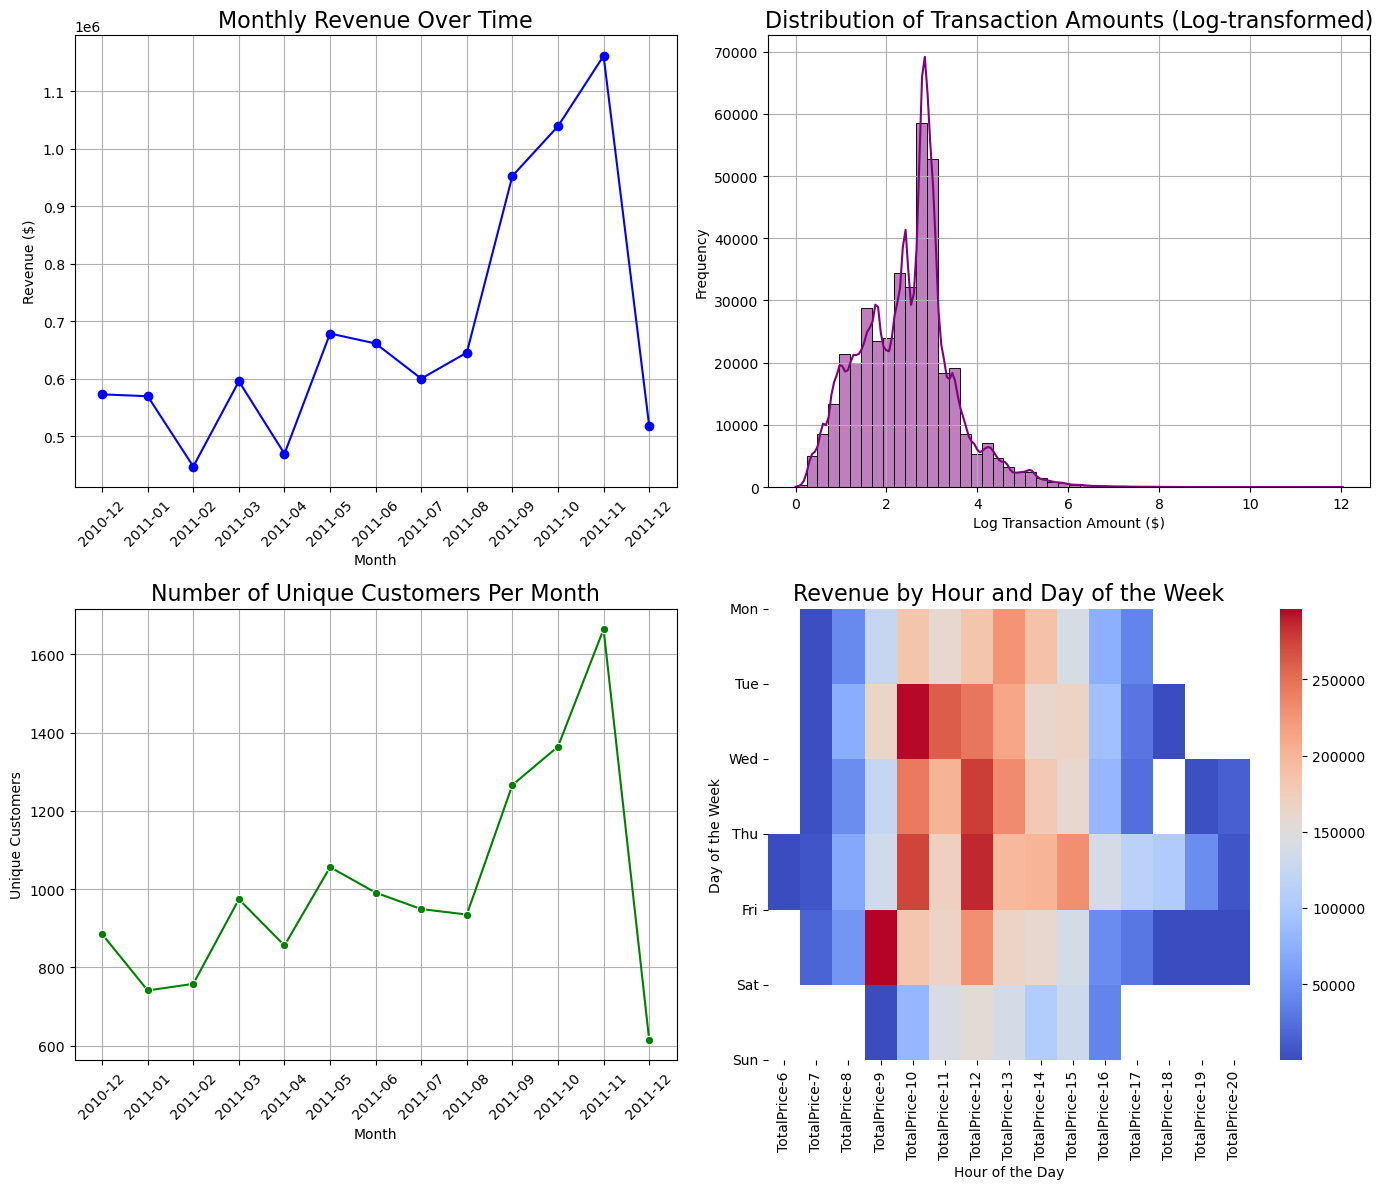

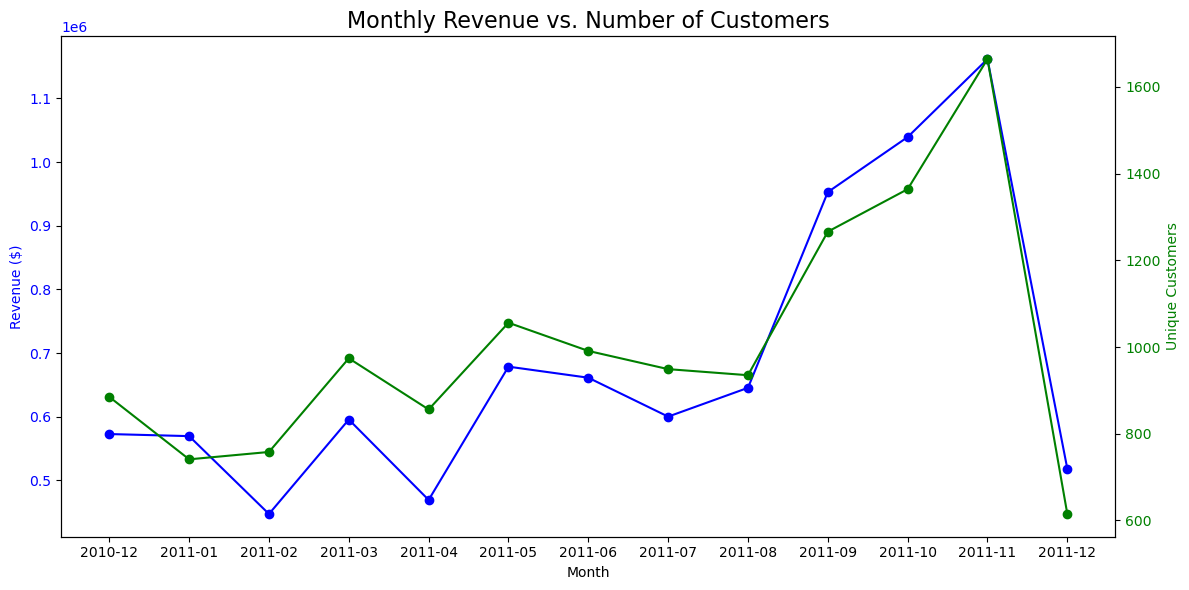

In [1]:
# Import libraries
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset, handling encoding issues
tx_data = pd.read_csv('./OnlineRetail.csv', encoding='ISO-8859-1')

# Data Cleaning
tx_data = tx_data.dropna(subset=['CustomerID'])
tx_data = tx_data[tx_data['Quantity'] > 0]
tx_data = tx_data[tx_data['UnitPrice'] > 0]

# Create a 'TotalPrice' column (Quantity * UnitPrice)
tx_data['TotalPrice'] = tx_data['Quantity'] * tx_data['UnitPrice']

# Convert 'InvoiceDate' to datetime format
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

# Create 'YearMonth' for monthly aggregation
tx_data['YearMonth'] = tx_data['InvoiceDate'].dt.to_period('M')

# Aggregate the monthly revenue
monthly_revenue = tx_data.groupby('YearMonth').agg({'TotalPrice': 'sum'}).reset_index()
monthly_revenue.columns = ['Month', 'Revenue']

# Aggregate unique customers per month
monthly_customers = tx_data.groupby('YearMonth').agg({'CustomerID': 'nunique'}).reset_index()
monthly_customers.columns = ['Month', 'Unique Customers']

# Create additional columns for hour and day of the week
tx_data['Hour'] = tx_data['InvoiceDate'].dt.hour
tx_data['DayOfWeek'] = tx_data['InvoiceDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Aggregate data to get revenue by day of the week and hour
heatmap_data = tx_data.groupby(['DayOfWeek', 'Hour']).agg({'TotalPrice': 'sum'}).unstack()

# Log-transform the 'TotalPrice' to better visualize the distribution (avoid skewness)
tx_data['LogTotalPrice'] = np.log1p(tx_data['TotalPrice'])

# Create the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# --- Plot 1: Monthly Revenue Over Time ---
axes[0, 0].plot(monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o', color='b', linestyle='-')
axes[0, 0].set_title('Monthly Revenue Over Time', fontsize=16)
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# --- Plot 2: Revenue Distribution (Log-transformed) ---
sns.histplot(tx_data['LogTotalPrice'], bins=50, kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Transaction Amounts (Log-transformed)', fontsize=16)
axes[0, 1].set_xlabel('Log Transaction Amount ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# --- Plot 3: Number of Unique Customers per Month ---
sns.lineplot(x=monthly_customers['Month'].astype(str), y=monthly_customers['Unique Customers'], marker='o', color='g', ax=axes[1, 0])
axes[1, 0].set_title('Number of Unique Customers Per Month', fontsize=16)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Unique Customers')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True)

# --- Plot 4: Heatmap of Revenue by Day of Week and Hour ---
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.0f', ax=axes[1, 1])
axes[1, 1].set_title('Revenue by Hour and Day of the Week', fontsize=16)
axes[1, 1].set_xlabel('Hour of the Day')
axes[1, 1].set_ylabel('Day of the Week')
axes[1, 1].set_yticks([0, 1, 2, 3, 4, 5, 6])
axes[1, 1].set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

# Plot 5: Monthly Revenue vs. Number of Customers (Dual Axis Plot) - Separate Figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Revenue on primary axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue ($)', color='b')
ax1.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o', color='b', label='Revenue')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Unique Customers
ax2 = ax1.twinx()
ax2.set_ylabel('Unique Customers', color='g')
ax2.plot(monthly_customers['Month'].astype(str), monthly_customers['Unique Customers'], marker='o', color='g', label='Customers')
ax2.tick_params(axis='y', labelcolor='g')

# Add title and formatting
plt.title('Monthly Revenue vs. Number of Customers', fontsize=16)
fig.tight_layout()

# Show the plot
plt.show()


### Plots Included:
- **Plot 1**: Monthly revenue trend over time.
- **Plot 2**: Distribution of transaction amounts (log-transformed).
- **Plot 3**: Number of unique customers per month.
- **Plot 4**: Heatmap showing revenue distribution by hour and day of the week.
- **Plot 5**: Dual-axis plot comparing revenue and customer count over time.



### Findings:

1. **Monthly Revenue Trends**:
   - The revenue shows notable fluctuations over time, with a significant peak around **November 2011**, likely influenced by seasonal factors (e.g., holiday shopping). The sharp drop in **December 2011** could indicate incomplete data for the month or post-holiday slowdown.

2. **Transaction Amount Distribution**:
   - The log-transformed distribution of transaction amounts is highly skewed, with most transactions being on the lower end, indicating many small purchases and fewer large purchases (consistent with typical retail behavior).

3. **Unique Customers per Month**:
   - The number of unique customers closely follows the revenue trend, with a large spike in **November 2011**, supporting the idea of a major shopping season. The drop in **December 2011** further suggests seasonality effects or incomplete data.

4. **Heatmap (Revenue by Hour and Day)**:
   - Peak revenue occurs on **Fridays and Thursdays** around midday, indicating that customers are more active during work hours, particularly toward the end of the week.

5. **Revenue vs. Number of Customers**:
   - Revenue and customer growth are tightly correlated, with both peaking in **November 2011**, again suggesting seasonal shopping events like **Black Friday** driving sales.

In summary, the data highlights **seasonal shopping behaviors** and typical retail patterns, with peaks around major holidays and higher activity during weekdays, especially on Fridays.

## Monthly Active Customers (MAC)





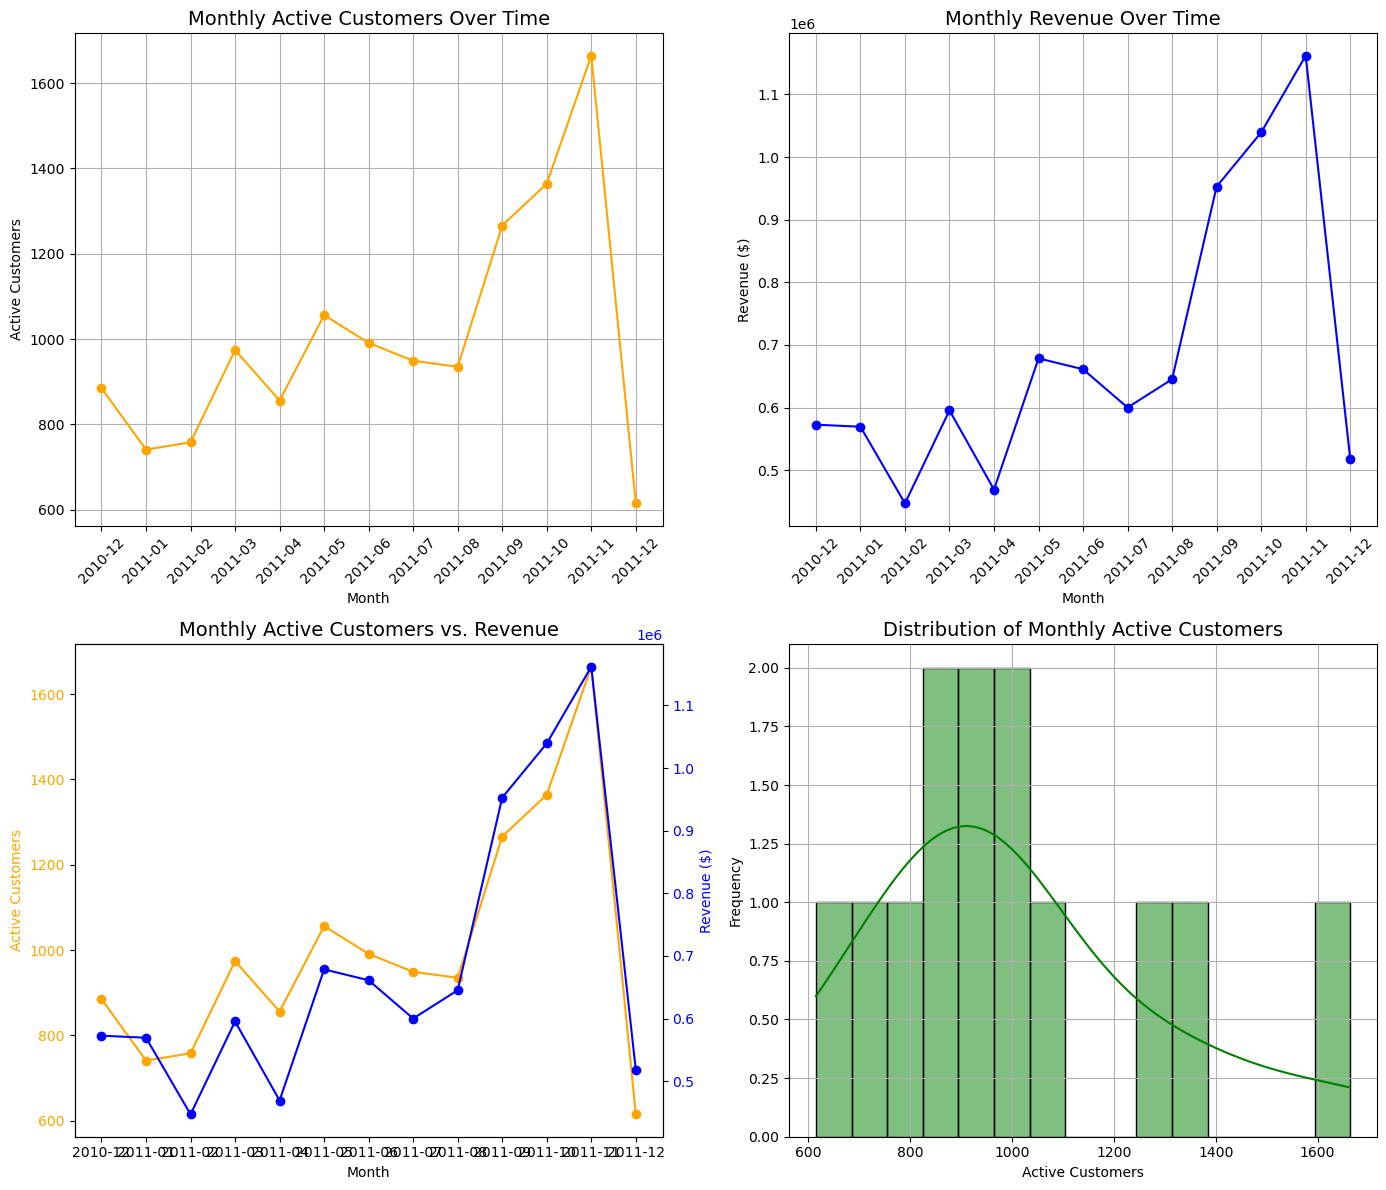

In [2]:
# Step 1: Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# --- Plot 1: Monthly Active Customers Over Time ---
axes[0, 0].plot(monthly_customers['Month'].astype(str), 
                monthly_customers['Unique Customers'], 
                marker='o', color='orange', linestyle='-')
axes[0, 0].set_title('Monthly Active Customers Over Time', fontsize=14)
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Active Customers')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# --- Plot 2: Monthly Revenue Over Time ---
axes[0, 1].plot(monthly_revenue['Month'].astype(str), 
                monthly_revenue['Revenue'], 
                marker='o', color='blue', linestyle='-')
axes[0, 1].set_title('Monthly Revenue Over Time', fontsize=14)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True)

# --- Plot 3: Dual Axis Plot (MAC vs Revenue) ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()

# Plot Monthly Active Customers on the left axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Active Customers', color='orange')
ax1.plot(monthly_customers['Month'].astype(str), 
         monthly_customers['Unique Customers'], 
         marker='o', color='orange', label='Active Customers')
ax1.tick_params(axis='y', labelcolor='orange')

# Plot Monthly Revenue on the right axis
ax2.set_ylabel('Revenue ($)', color='blue')
ax2.plot(monthly_revenue['Month'].astype(str), 
         monthly_revenue['Revenue'], 
         marker='o', color='blue', label='Revenue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title
ax1.set_title('Monthly Active Customers vs. Revenue', fontsize=14)

# --- Plot 4: Distribution of Monthly Active Customers ---
sns.histplot(monthly_customers['Unique Customers'], 
             bins=15, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Monthly Active Customers', fontsize=14)
axes[1, 1].set_xlabel('Active Customers')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


## New Customer Ratio
#### First we should define what is a new customer. In our dataset, we can assume a new customer is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example.


In [3]:
# Step 1: Identify the first purchase date for each customer
tx_data['FirstPurchaseDate'] = tx_data.groupby('CustomerID')['InvoiceDate'].transform('min')

# Step 2: Define new customers - those whose first purchase occurred in the current month
tx_data['is_new_customer'] = tx_data['InvoiceDate'] == tx_data['FirstPurchaseDate']

# Step 3: Calculate New Customers and Total Active Customers per month
monthly_customers_stats = tx_data.groupby('YearMonth').agg({
    'CustomerID': 'nunique',  # Total active customers
    'is_new_customer': 'sum'  # New customers (sum of True values)
}).reset_index()

# Rename columns for clarity
monthly_customers_stats.columns = ['Month', 'Active Customers', 'New Customers']

# Step 4: Calculate New Customer Ratio
monthly_customers_stats['New Customer Ratio'] = monthly_customers_stats['New Customers'] / monthly_customers_stats['Active Customers']


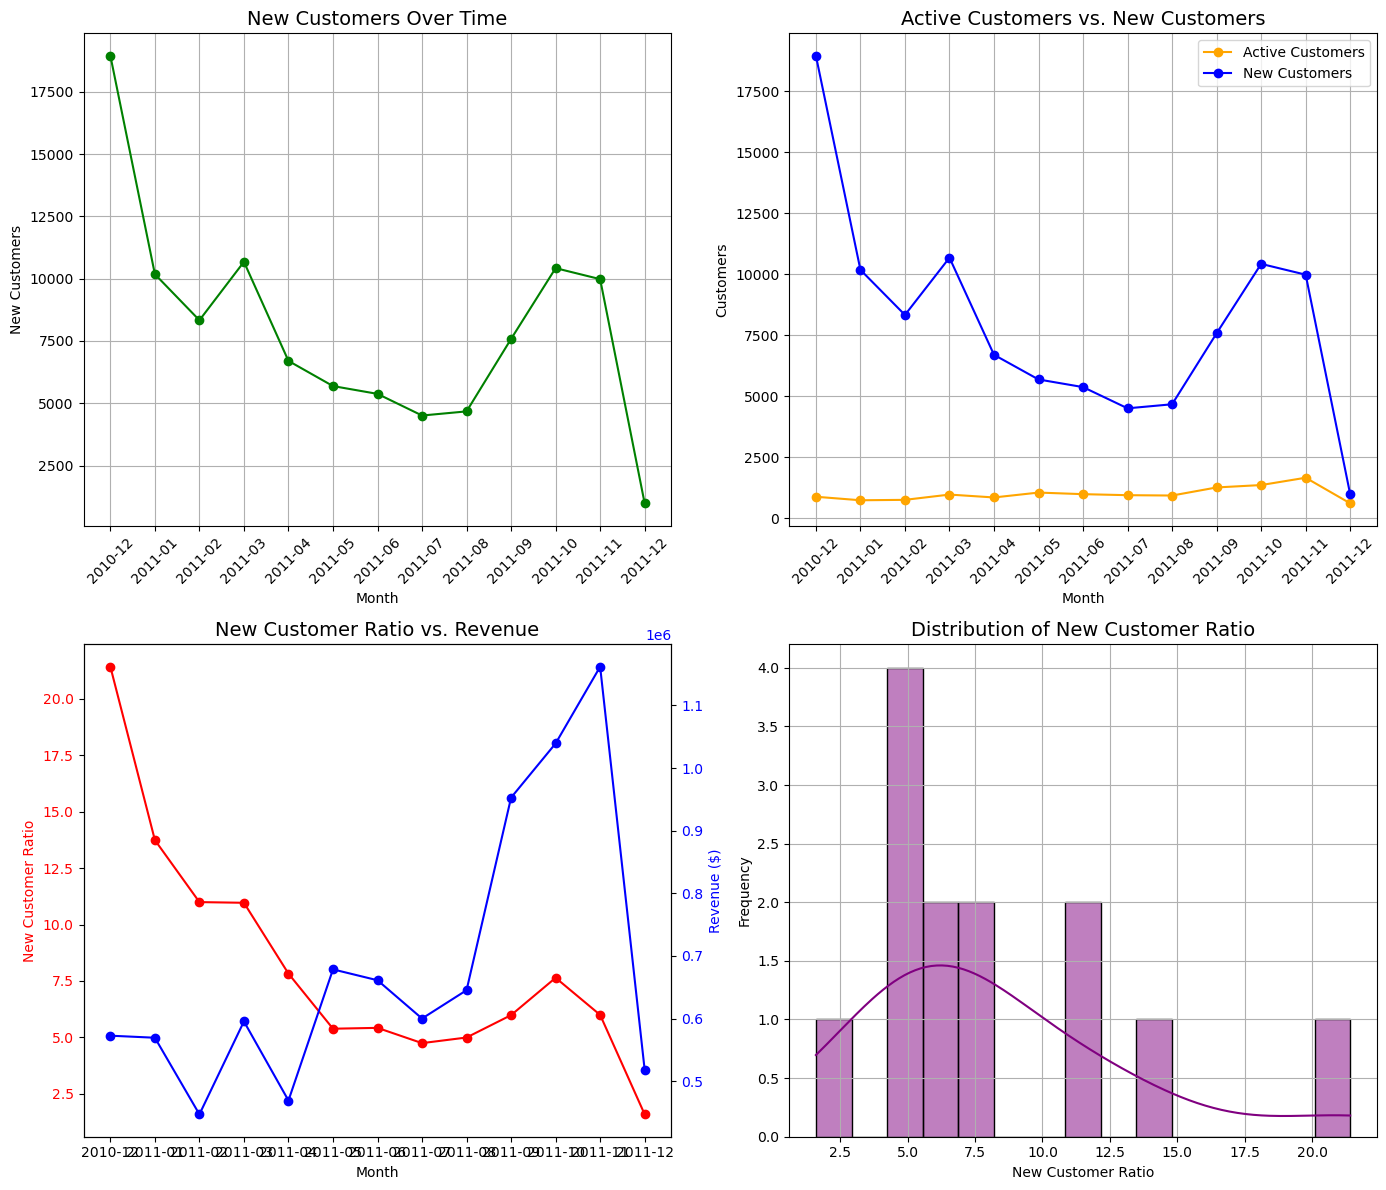

,Month,Active Customers,New Customers,New Customer Ratio
0,2010-12,885,18950,21.412429
1,2011-01,741,10179,13.736842
2,2011-02,758,8332,10.992084
3,2011-03,974,10677,10.962012
4,2011-04,856,6699,7.825935
5,2011-05,1056,5689,5.387311
6,2011-06,991,5376,5.424823
7,2011-07,949,4507,4.749210
8,2011-08,935,4673,4.997861
9,2011-09,1266,7582,5.988942


In [4]:
# Step 1: Identify the first purchase date for each customer
tx_data['FirstPurchaseDate'] = tx_data.groupby('CustomerID')['InvoiceDate'].transform('min')

# Step 2: Define new customers - those whose first purchase occurred in the current month
tx_data['is_new_customer'] = tx_data['InvoiceDate'] == tx_data['FirstPurchaseDate']

# Step 3: Calculate New Customers and Total Active Customers per month
monthly_customers_stats = tx_data.groupby('YearMonth').agg({
    'CustomerID': 'nunique',  # Total active customers
    'is_new_customer': 'sum'  # New customers (sum of True values)
}).reset_index()

# Rename columns for clarity
monthly_customers_stats.columns = ['Month', 'Active Customers', 'New Customers']

# Step 4: Calculate New Customer Ratio
monthly_customers_stats['New Customer Ratio'] = monthly_customers_stats['New Customers'] / monthly_customers_stats['Active Customers']

# Step 5: Set up the 2x2 grid for visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# --- Plot 1: New Customers Over Time ---
axes[0, 0].plot(monthly_customers_stats['Month'].astype(str), 
                monthly_customers_stats['New Customers'], 
                marker='o', color='green', linestyle='-')
axes[0, 0].set_title('New Customers Over Time', fontsize=14)
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('New Customers')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# --- Plot 2: Active Customers vs. New Customers ---
axes[0, 1].plot(monthly_customers_stats['Month'].astype(str), 
                monthly_customers_stats['Active Customers'], 
                marker='o', color='orange', linestyle='-', label='Active Customers')
axes[0, 1].plot(monthly_customers_stats['Month'].astype(str), 
                monthly_customers_stats['New Customers'], 
                marker='o', color='blue', linestyle='-', label='New Customers')
axes[0, 1].set_title('Active Customers vs. New Customers', fontsize=14)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Customers')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True)

# --- Plot 3: Dual Axis Plot (New Customer Ratio vs Revenue) ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()

# Plot New Customer Ratio on left axis
ax1.set_xlabel('Month')
ax1.set_ylabel('New Customer Ratio', color='red')
ax1.plot(monthly_customers_stats['Month'].astype(str), 
         monthly_customers_stats['New Customer Ratio'], 
         marker='o', color='red', label='New Customer Ratio')
ax1.tick_params(axis='y', labelcolor='red')

# Plot Monthly Revenue on the right axis
ax2.set_ylabel('Revenue ($)', color='blue')
ax2.plot(monthly_revenue['Month'].astype(str), 
         monthly_revenue['Revenue'], 
         marker='o', color='blue', label='Revenue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title
ax1.set_title('New Customer Ratio vs. Revenue', fontsize=14)

# --- Plot 4: Distribution of New Customer Ratio ---
sns.histplot(monthly_customers_stats['New Customer Ratio'], 
             bins=15, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of New Customer Ratio', fontsize=14)
axes[1, 1].set_xlabel('New Customer Ratio')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Display computed results (optional)
monthly_customers_stats[['Month', 'Active Customers', 'New Customers', 'New Customer Ratio']]


### Findings:

1. **New Customers Over Time**:
   - The number of new customers sharply declines after a peak in **December 2010**, followed by steady decreases throughout **2011**, suggesting lower acquisition rates in the following months.

2. **Active Customers vs. New Customers**:
   - New customers significantly outnumber active customers in most months, indicating that a large portion of the customer base is new.
   - Both metrics follow similar patterns, with a notable peak in **October 2011**.

3. **New Customer Ratio vs. Revenue**:
   - The **New Customer Ratio** steadily decreases after **December 2010**, suggesting that fewer new customers contribute to the overall active customer base as time progresses.
   - Revenue increases sharply towards the end of **2011**, even as the new customer ratio declines, indicating that **existing customers** are driving the revenue growth.

4. **Distribution of New Customer Ratio**:
   - Most months have a **New Customer Ratio** between **2.5% and 12.5%**, with a few higher outliers, implying that a consistent percentage of active customers are new, but major acquisition spikes are rare. 

These findings suggest that while **new customer acquisition** was strong at the start of the period, revenue growth later relies more on **retaining existing customers**.

## Part 2: Customer Segmentation

In [5]:
# Print the column names of the dataset
print(tx_data.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'YearMonth', 'Hour',
       'DayOfWeek', 'LogTotalPrice', 'FirstPurchaseDate', 'is_new_customer'],
      dtype='object')


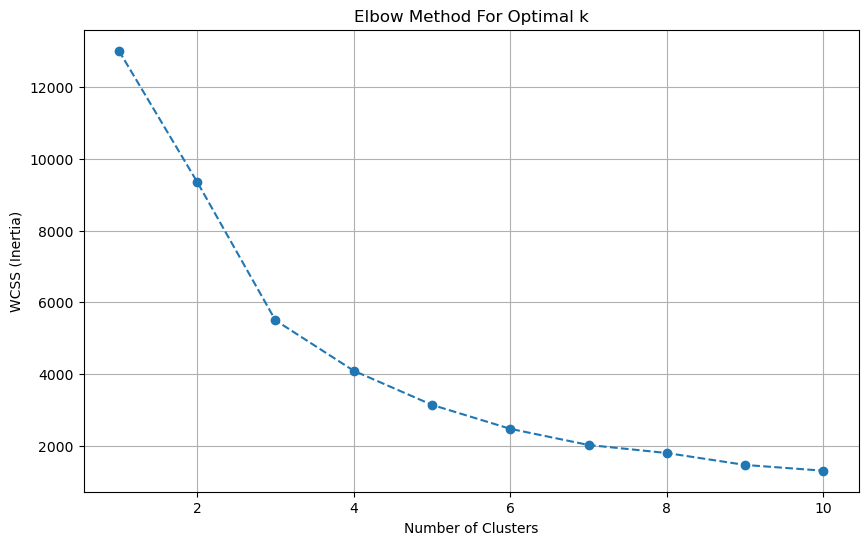

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preparation (Fixing the 'Amount' column)
# Ensure that 'Amount' exists by creating it from 'Quantity' and 'UnitPrice'
tx_data['Amount'] = tx_data['Quantity'] * tx_data['UnitPrice']

# Remove missing CustomerID and negative Amount values
tx_data = tx_data.dropna(subset=['CustomerID'])
tx_data = tx_data[tx_data['Amount'] > 0]

# Step 2: RFM Calculation
# Calculate the latest date in the dataset
latest_date = tx_data['InvoiceDate'].max()

# Aggregate RFM values for each customer
rfm = tx_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (count unique transactions)
    'Amount': 'sum'  # Monetary (total spending)
}).reset_index()

# Rename the columns for better readability
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 3: RFM Scoring
# Score Recency, Frequency, and Monetary based on quintiles (or any method)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])  # Lower recency is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])  # Higher frequency is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])  # Higher monetary is better

# Create a combined RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


# Step 4: Elbow Method to find the optimal number of clusters
# Standardize the RFM values for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Calculate WCSS for different numbers of clusters (1 to 10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()




#### Here it looks like 4 is the optimal one. Based on business requirements, we can go ahead with less or more clusters. 
#### We will be selecting 4 for this example:
    

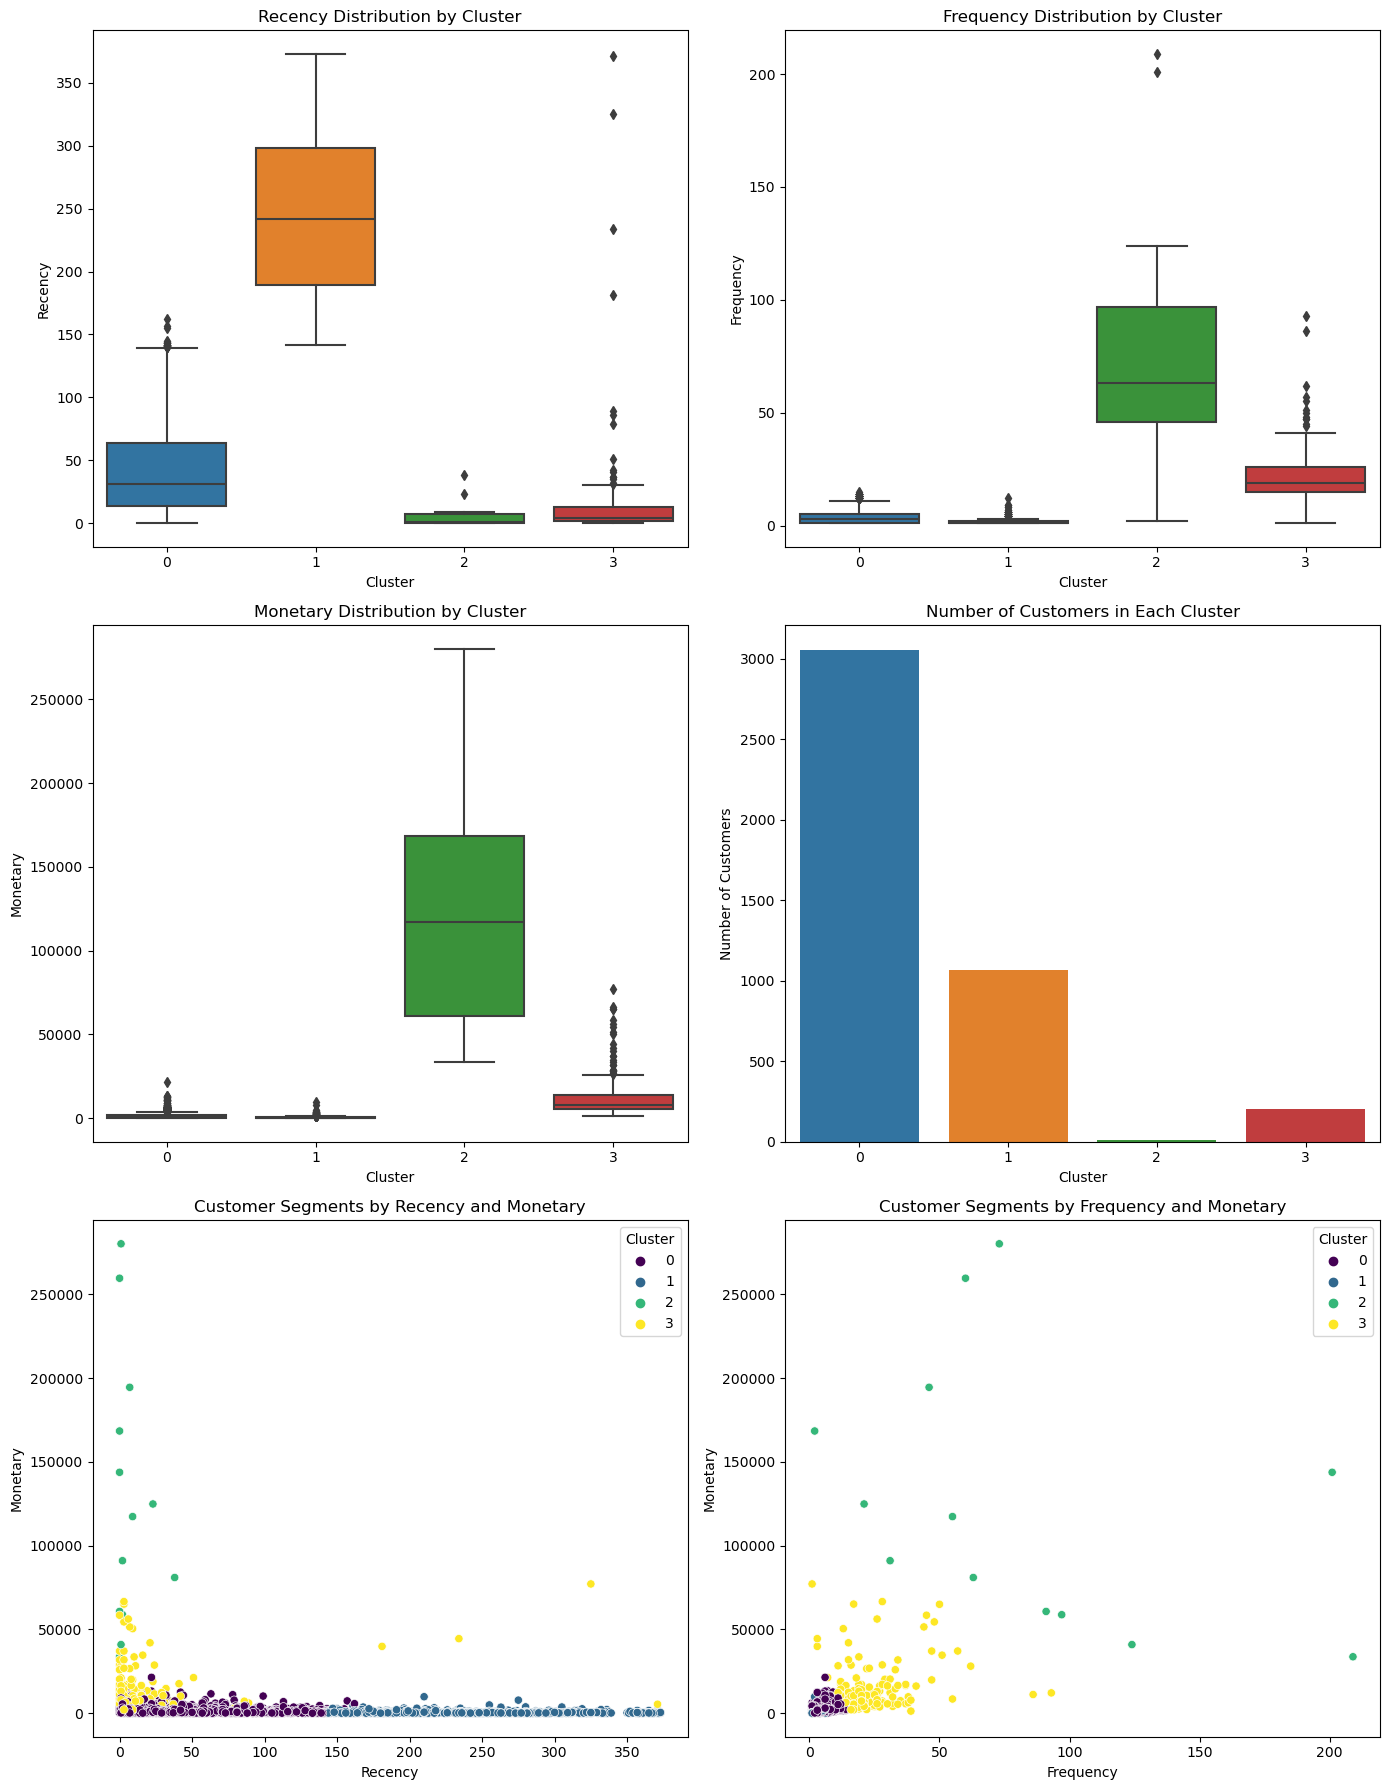

In [7]:

    
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Add the cluster labels to the RFM DataFrame
rfm['Cluster'] = kmeans.labels_

# Step 5: Visualizations in a 3x2 grid

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# --- Plot 1: Recency Distribution by Cluster ---
sns.boxplot(x='Cluster', y='Recency', data=rfm, ax=axes[0, 0])
axes[0, 0].set_title('Recency Distribution by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Recency')

# --- Plot 2: Frequency Distribution by Cluster ---
sns.boxplot(x='Cluster', y='Frequency', data=rfm, ax=axes[0, 1])
axes[0, 1].set_title('Frequency Distribution by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Frequency')

# --- Plot 3: Monetary Distribution by Cluster ---
sns.boxplot(x='Cluster', y='Monetary', data=rfm, ax=axes[1, 0])
axes[1, 0].set_title('Monetary Distribution by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Monetary')

# --- Plot 4: Number of Customers in Each Cluster ---
sns.countplot(x='Cluster', data=rfm, ax=axes[1, 1])
axes[1, 1].set_title('Number of Customers in Each Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Customers')

# --- Plot 5: Scatterplot (Recency vs Monetary, colored by Cluster) ---
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Customer Segments by Recency and Monetary')
axes[2, 0].set_xlabel('Recency')
axes[2, 0].set_ylabel('Monetary')

# --- Plot 6: Scatterplot (Frequency vs Monetary, colored by Cluster) ---
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Customer Segments by Frequency and Monetary')
axes[2, 1].set_xlabel('Frequency')
axes[2, 1].set_ylabel('Monetary')

# Adjust layout
plt.tight_layout()
plt.show()


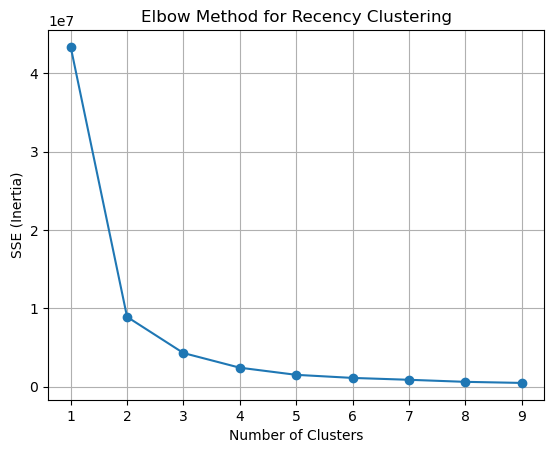

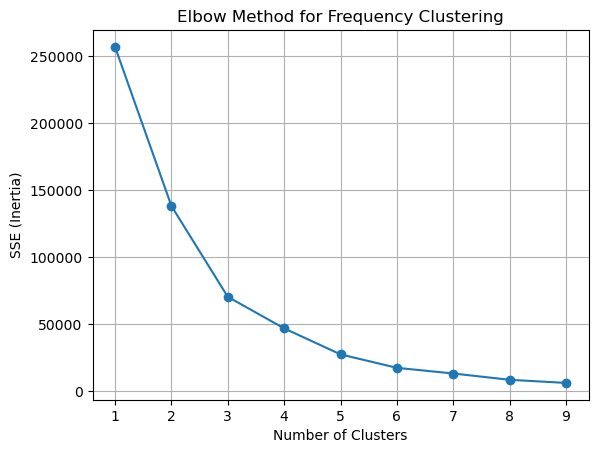

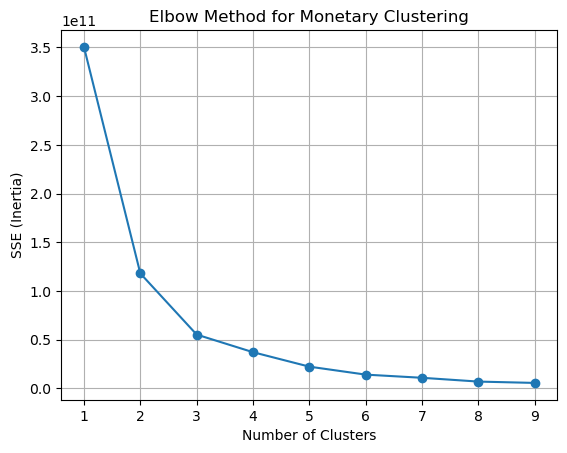

Recency Cluster Statistics
                    Recency                        Frequency         \
                       mean median  min  max count      mean median   
Recency_Cluster                                                       
0                307.632000  304.0  249  373   500  1.348000    1.0   
1                 79.593607   73.0   49  134  1095  2.671233    2.0   
2                190.064620  188.0  135  248   619  1.873990    1.0   
3                 18.109228   16.0    0   48  2124  6.484463    4.0   

                    Monetary            
                        mean    median  
Recency_Cluster                         
0                 565.003220   271.025  
1                1040.301408   642.770  
2                 726.757078   354.800  
3                3314.460274  1197.185  

Frequency Cluster Statistics
                      Recency          Frequency                         \
                         mean median        mean median  min  max count   
Frequenc

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming your RFM DataFrame (rfm) already has 'Recency', 'Frequency', 'Monetary'
# Step 1: Clustering by Recency

sse = {}  # To store the SSE for different cluster counts
tx_recency = rfm[['Recency']].copy()  # Copy of the Recency column for clustering

# Elbow Method for Recency
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Plotting the Elbow Method for Recency
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Recency Clustering')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

# Let's assume based on the Elbow plot, we choose 3 clusters for Recency
kmeans_recency = KMeans(n_clusters=4, max_iter=1000)
rfm['Recency_Cluster'] = kmeans_recency.fit_predict(rfm[['Recency']])

rfm['Recency_Cluster'] = rfm['Recency_Cluster'].max() - rfm['Recency_Cluster']



# Step 2: Clustering by Frequency
sse = {}
tx_frequency = rfm[['Frequency']].copy()

# Elbow Method for Frequency
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Plotting the Elbow Method for Frequency
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Frequency Clustering')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

# Let's assume 4 clusters for Frequency as well
kmeans_frequency = KMeans(n_clusters=4, max_iter=1000)
rfm['Frequency_Cluster'] = kmeans_frequency.fit_predict(rfm[['Frequency']])

# Step 3: Clustering by Monetary
sse = {}
tx_monetary = rfm[['Monetary']].copy()

# Elbow Method for Monetary
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_monetary)
    tx_monetary["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Plotting the Elbow Method for Monetary
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Monetary Clustering')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

# Let's assume 3 clusters for Monetary
kmeans_monetary = KMeans(n_clusters=4, max_iter=1000)
rfm['Monetary_Cluster'] = kmeans_monetary.fit_predict(rfm[['Monetary']])

# Step 4: Calculate statistics for each cluster
# Recency Cluster statistics
print("Recency Cluster Statistics")
print(rfm.groupby('Recency_Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max', 'count'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
}))

# Frequency Cluster statistics
print("\nFrequency Cluster Statistics")
print(rfm.groupby('Frequency_Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median', 'min', 'max', 'count'],
    'Monetary': ['mean', 'median']
}))

# Monetary Cluster statistics
print("\nMonetary Cluster Statistics")
print(rfm.groupby('Monetary_Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'min', 'max', 'count']
}))


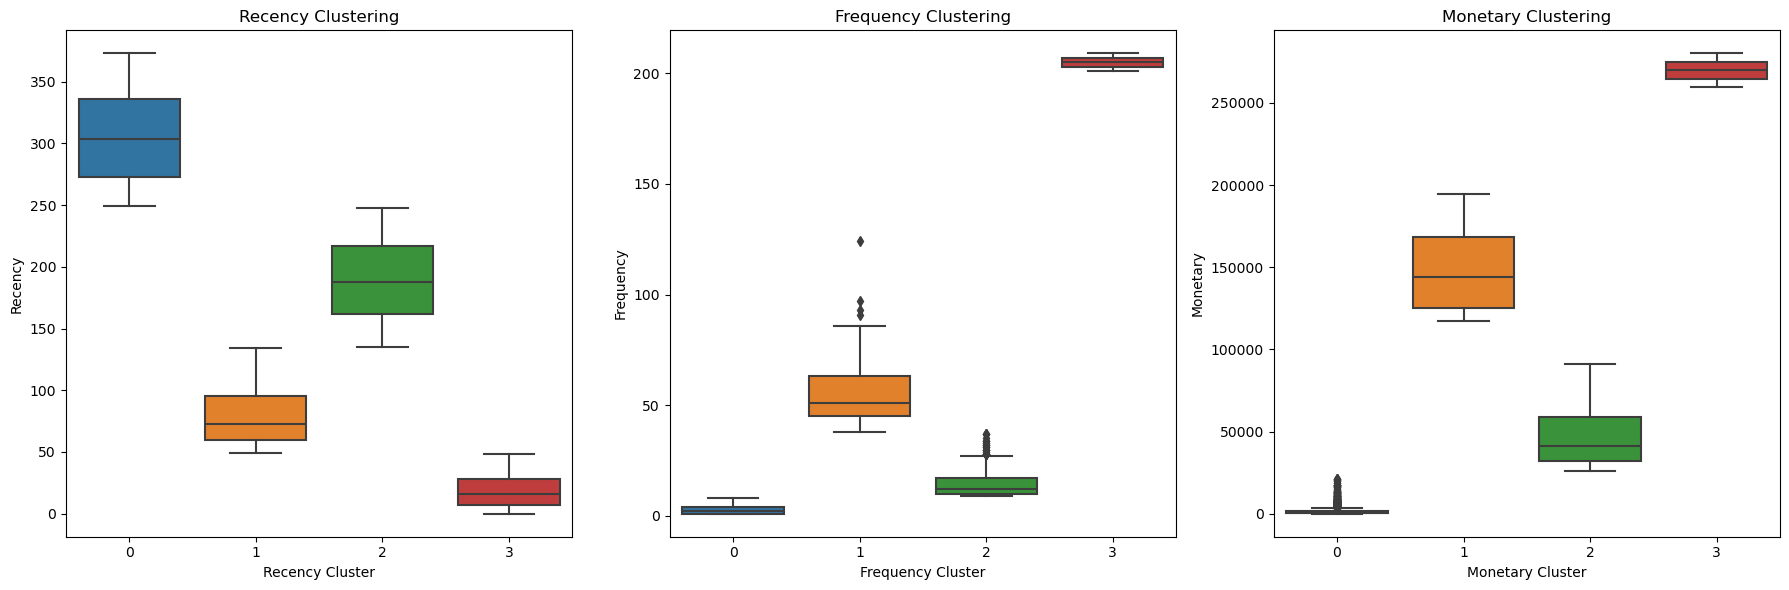

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Plot 1: Recency Clustering ---
sns.boxplot(x='Recency_Cluster', y='Recency', data=rfm, ax=axes[0])
axes[0].set_title('Recency Clustering')
axes[0].set_xlabel('Recency Cluster')
axes[0].set_ylabel('Recency')

# --- Plot 2: Frequency Clustering ---
sns.boxplot(x='Frequency_Cluster', y='Frequency', data=rfm, ax=axes[1])
axes[1].set_title('Frequency Clustering')
axes[1].set_xlabel('Frequency Cluster')
axes[1].set_ylabel('Frequency')

# --- Plot 3: Monetary Clustering ---
sns.boxplot(x='Monetary_Cluster', y='Monetary', data=rfm, ax=axes[2])
axes[2].set_title('Monetary Clustering')
axes[2].set_xlabel('Monetary Cluster')
axes[2].set_ylabel('Monetary')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Calculating the **Overall Score** by summing the cluster numbers for **Recency**, **Frequency**, and **Monetary** provides a comprehensive way to assess customer value. Here’s why:

1. **Holistic Customer Evaluation**:
   - **Recency** reflects how recently a customer made a purchase. A lower **Recency** score indicates more recent activity.
   - **Frequency** represents how often a customer buys. A higher **Frequency** cluster score indicates higher purchasing frequency, often signaling loyalty.
   - **Monetary** captures the total spending. A higher **Monetary** score means the customer spends more, making them more valuable.
   
   Adding these cluster scores offers a combined metric that reflects a customer’s behavior across **recency, frequency, and spending**.

2. **Simple and Effective Scoring**:
   - This approach balances the three dimensions of customer behavior to create a single, easy-to-interpret score.
   - By summing the scores, customers who score high in **Frequency** and **Monetary**, but perhaps lower in **Recency**, can still be recognized as valuable.

3. **Customer Segmentation**:
   - The **Overall Score** allows for quick segmentation of customers into categories like high, medium, or low value. This segmentation helps businesses tailor marketing strategies for each group.

4. **Ease of Implementation**:
   - This method is straightforward and easy to implement, making it useful for businesses to quickly analyze and rank customers.

### Summary:
Summing the cluster numbers for **Recency**, **Frequency**, and **Monetary** creates an **Overall Score** that gives businesses a comprehensive view of customer value. This simple yet powerful approach helps identify high-value customers and supports effective customer segmentation for targeted marketing strategies.

  OverallScore     Recency                    Frequency                   \
                      mean median  min  max        mean median  min  max   
0            0  307.469880  303.5  249  373    1.283133    1.0    1    8   
1            1   79.725490   74.0   49  134    2.479925    2.0    1    8   
2            2  190.629690  188.0  135  371    1.838499    1.0    1   34   
3            3   20.703898   19.0    0  125    3.571262    3.0    1   17   
4            4   85.055556   14.5    0  234   30.333333   25.0    2   93   
5            5   11.374677    8.0    0   48   14.860465   13.0    9   55   
6            6    7.461538    3.0    0   38   61.538462   51.0   21  124   
7            7    5.722222    3.0    0   24   36.944444   24.5   11  201   
8            8    0.000000    0.0    0    0  209.000000  209.0  209  209   

       Monetary                                  
           mean     median       min        max  
0    401.459438    269.790      3.75    7832.47  
1    987.8295

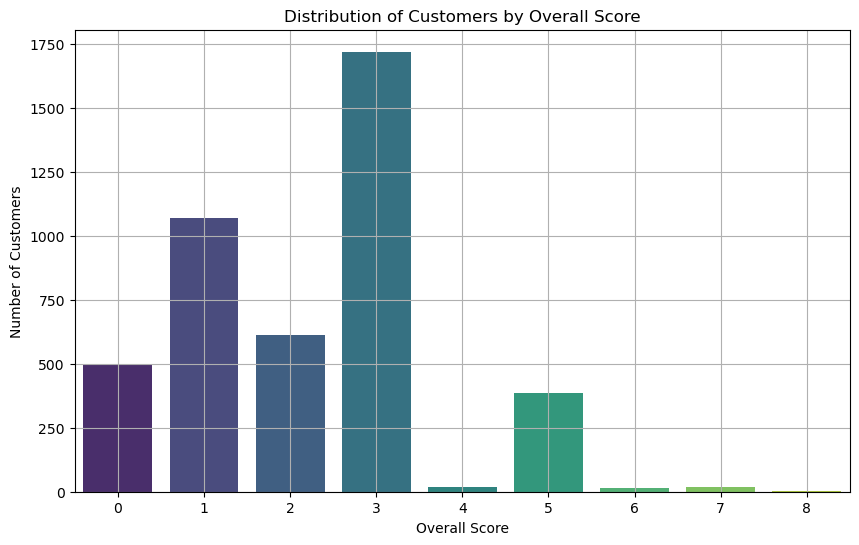

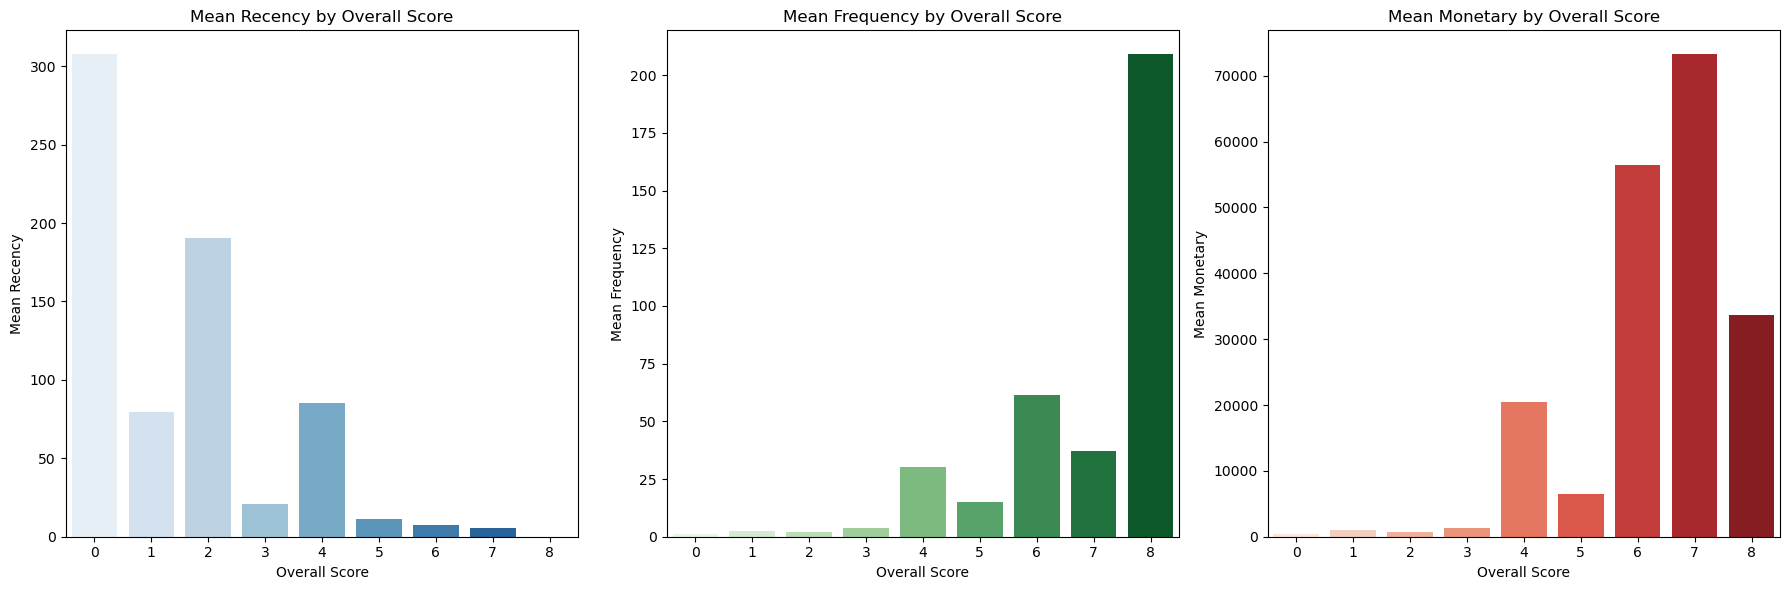

In [10]:
# Step 1: Calculate Overall Score
# The OverallScore is the sum of the Recency, Frequency, and Monetary cluster numbers

rfm['OverallScore'] = rfm['Recency_Cluster'] + rfm['Frequency_Cluster'] + rfm['Monetary_Cluster']


# Step 2: Group by OverallScore and calculate the mean for Recency, Frequency, and Monetary
overall_score_stats = rfm.groupby('OverallScore').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max']
}).reset_index()

# Display the summary statistics for each OverallScore
print(overall_score_stats)

# Step 3: Visualize the OverallScore distribution

# Plot the distribution of OverallScore and the number of customers in each score group
plt.figure(figsize=(10, 6))
sns.countplot(x='OverallScore', data=rfm, palette='viridis')
plt.title('Distribution of Customers by Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Step 4: Visualize the relationship between OverallScore and mean Recency, Frequency, and Monetary

# Plot Recency, Frequency, and Monetary means by OverallScore
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Plot 1: Mean Recency by OverallScore ---
sns.barplot(x='OverallScore', y=('Recency', 'mean'), data=overall_score_stats, ax=axes[0], palette='Blues')
axes[0].set_title('Mean Recency by Overall Score')
axes[0].set_xlabel('Overall Score')
axes[0].set_ylabel('Mean Recency')

# --- Plot 2: Mean Frequency by OverallScore ---
sns.barplot(x='OverallScore', y=('Frequency', 'mean'), data=overall_score_stats, ax=axes[1], palette='Greens')
axes[1].set_title('Mean Frequency by Overall Score')
axes[1].set_xlabel('Overall Score')
axes[1].set_ylabel('Mean Frequency')

# --- Plot 3: Mean Monetary by OverallScore ---
sns.barplot(x='OverallScore', y=('Monetary', 'mean'), data=overall_score_stats, ax=axes[2], palette='Reds')
axes[2].set_title('Mean Monetary by Overall Score')
axes[2].set_xlabel('Overall Score')
axes[2].set_ylabel('Mean Monetary')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Let's  calculate an **Overall Score** based on the **Recency**, **Frequency**, and **Monetary** cluster values we previously calculated.

In this case, we will:
1. Sum the cluster numbers of **Recency**, **Frequency**, and **Monetary** to create an **OverallScore**.
2. Group customers by the **OverallScore** and calculate the **mean** for **Recency**, **Frequency**, and **Monetary**.
3. Visualize the OverallScore distribution.


### Explanation:

1. **Step 1: Calculate Overall Score**:
   - We sum the cluster numbers for **Recency**, **Frequency**, and **Monetary** to generate the **OverallScore**. A lower overall score suggests better customer engagement (recent purchases, frequent orders, and high spending).

2. **Step 2: Group by Overall Score**:
   - We group the data by **OverallScore** and calculate the **mean**, **median**, **min**, and **max** for **Recency**, **Frequency**, and **Monetary** to understand the characteristics of each overall score group.

3. **Step 3: Visualization of Overall Score**:
   - We use a **count plot** to visualize the distribution of customers across the **OverallScore** groups. This helps to see how many customers fall into each group.

4. **Step 4: Plot Mean Recency, Frequency, and Monetary by Overall Score**:
   - **Barplots** are used to show how the **mean** values of **Recency**, **Frequency**, and **Monetary** change across different **OverallScore** groups. This helps in interpreting the customer behavior for each score.


To define **low-value**, **median-value**, and **high-value** customers based on their **Overall Score**, we can break the customers into segments like this:

1. **Low-value customers**: Customers with low scores (e.g., `OverallScore` of **0 or 1**). These customers are either recent buyers but spend little and buy infrequently.
2. **Median-value customers**: Customers with moderate scores (e.g., `OverallScore` of **2 **). These customers may have a mix of recency, frequency, and monetary values, providing moderate value to the business.
3. **High-value customers**: Customers with high scores (e.g., `OverallScore` of **3 or 4**). These customers are frequent buyers, spend a lot, but may not be recent.

### Steps:

1. **Define segments** for low-value, median-value, and high-value customers based on the **OverallScore**.
2. **Scatter Plot** to visualize how these customer segments are distributed based on **Recency** and **Monetary**.


### Example Insights:

- **Low-value customers**: These customers are likely to have made recent purchases (low recency) but spend very little and don’t buy often.
- **High-value customers**: These are typically high spenders with frequent purchases, but they may not be the most recent buyers.
- **Median-value customers**: These customers are somewhere in between, offering moderate spending and purchase frequency.

This approach helps identify where customer value lies and allows you to focus on re-engaging valuable customers or nurturing low-value customers into higher segments.


In [11]:
# Step 3: Low, Mid, and High value groups based on Overall Score (range 0 to 8)
rfm['CustomerValueSegment'] = pd.cut(rfm['OverallScore'], 
                                     bins=[-1, 2, 4, 8],  # Adjust the bins to match the score range
                                     labels=['Low Value', 'Mid Value', 'High Value'])

# Step 4: View the number of customers in each grouping
segment_counts = rfm['CustomerValueSegment'].value_counts()
print(segment_counts)

# Step 5: View statistics for each customer group (Recency, Frequency, Monetary average, etc.)
segment_stats = rfm.groupby('CustomerValueSegment').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
}).reset_index()

print(segment_stats)



CustomerValueSegment
Low Value     2182
Mid Value     1737
High Value     419
Name: count, dtype: int64
  CustomerValueSegment     Recency                  Frequency         \
                              mean median min  max       mean median   
0            Low Value  162.860678  138.0  49  373   2.026581    1.0   
1            Mid Value   21.370754   19.0   0  234   3.848590    3.0   
2           High Value   10.983294    8.0   0   48  17.720764   13.0   

       Monetary           
           mean   median  
0    771.443507   415.45  
1   1524.599091   882.24  
2  10930.523986  4757.95  


### Findings Based on the Visualizations:

1. **Recency vs. Overall Score**:
   - **Lower overall scores** (especially **0 to 2**, categorized as **Low Value**) have **lower recency**, meaning these customers have made recent purchases and are more active.
   - **Higher overall scores** (e.g., **5 and above**, categorized as **High Value**) show **higher recency**, indicating that these customers made purchases further in the past, making them less engaged recently.
   - Customers with an **overall score of 0** have the lowest recency, making them the most engaged and likely the most recently active customers.

2. **Frequency vs. Overall Score**:
   - **Higher overall scores** (especially **5 and above**, or **High Value** customers) are associated with **higher purchase frequency**, indicating they make purchases more frequently and are loyal customers.
   - **Lower overall scores** (e.g., **0 to 2**, or **Low Value** customers) have **lower purchase frequencies**, meaning these customers rarely make purchases.

3. **Monetary vs. Overall Score**:
   - **Higher overall scores** (especially **5 and above**, or **High Value** customers) correspond to **higher monetary values**, indicating these customers spend significantly more.
   - **Lower overall scores** (e.g., **0 to 2**, or **Low Value** customers) have much smaller monetary values, meaning they contribute less in terms of spending.

4. **Distribution of Overall Score**:
   - The majority of customers fall into the **Low Value** category (Overall Score between **0 and 2**), representing the largest group of customers who have **recently made purchases** but might not spend much or buy frequently.
   - As the **Overall Score** increases, the number of customers decreases, indicating fewer customers in the **High Value** segment (Overall Score of **5 and above**) who are both frequent buyers and high spenders.

### Key Insights:

- **Low-value customers** (Overall Score **0 to 2**) tend to make **recent purchases**, but they generally spend less and buy less frequently.
- **High-value customers** (Overall Score **5 and above**) contribute the most in terms of spending and purchase frequency, but they have **higher recency**, meaning they may have been less active recently and require **re-engagement**.
- The majority of customers fall into the **low-value group**, representing a large portion of the customer base. These customers may have potential for growth if they can be encouraged to spend more and purchase more frequently.

This analysis suggests that the business should prioritize **retaining and re-engaging high-value customers** (who are the most profitable) while focusing on **nurturing low-value customers** to increase their spending and engagement over time.

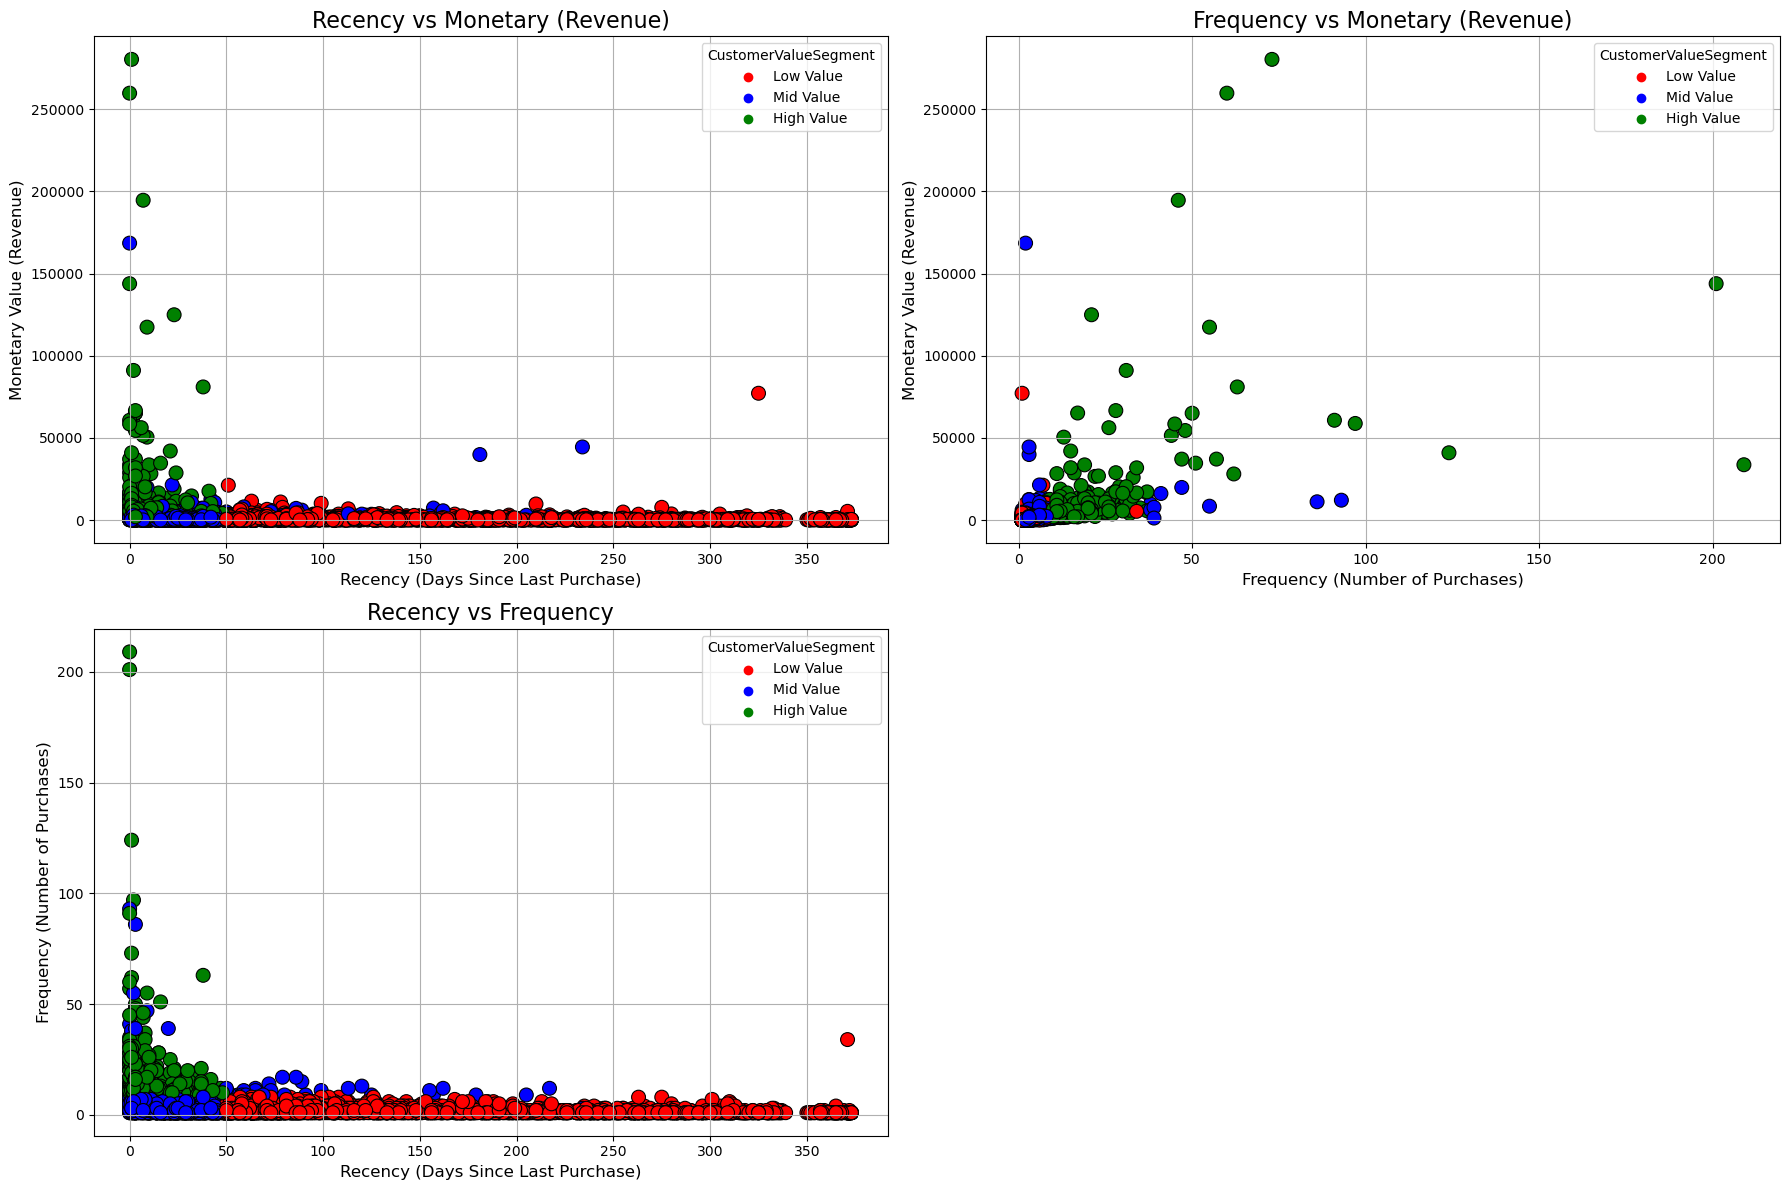

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Low, Mid, High value groups 
rfm['CustomerValueSegment'] = pd.cut(rfm['OverallScore'], 
                                     bins=[-1, 2, 4, rfm['OverallScore'].max()], 
                                     labels=['Low Value', 'Mid Value', 'High Value'])

# Step 2: Recency vs Monetary、Frequency vs Monetary、Recency vs Frequency
fig, axes = plt.subplots(2, 2, figsize=(18, 12))


palette = {'Low Value': 'red', 'Mid Value': 'blue', 'High Value': 'green'}

# --- Plot 1: Recency vs Monetary ---
sns.scatterplot(x='Recency', 
                y='Monetary', 
                hue='CustomerValueSegment', 
                data=rfm, 
                palette=palette, 
                s=100, 
                edgecolor='black', 
                ax=axes[0, 0])

axes[0, 0].set_title('Recency vs Monetary (Revenue)', fontsize=16)
axes[0, 0].set_xlabel('Recency (Days Since Last Purchase)', fontsize=12)
axes[0, 0].set_ylabel('Monetary Value (Revenue)', fontsize=12)
axes[0, 0].grid(True)

# --- Plot 2: Frequency vs Monetary ---
sns.scatterplot(x='Frequency', 
                y='Monetary', 
                hue='CustomerValueSegment', 
                data=rfm, 
                palette=palette, 
                s=100, 
                edgecolor='black', 
                ax=axes[0, 1])

axes[0, 1].set_title('Frequency vs Monetary (Revenue)', fontsize=16)
axes[0, 1].set_xlabel('Frequency (Number of Purchases)', fontsize=12)
axes[0, 1].set_ylabel('Monetary Value (Revenue)', fontsize=12)
axes[0, 1].grid(True)

# --- Plot 3: Recency vs Frequency ---
sns.scatterplot(x='Recency', 
                y='Frequency', 
                hue='CustomerValueSegment', 
                data=rfm, 
                palette=palette, 
                s=100, 
                edgecolor='black', 
                ax=axes[1, 0])

axes[1, 0].set_title('Recency vs Frequency', fontsize=16)
axes[1, 0].set_xlabel('Recency (Days Since Last Purchase)', fontsize=12)
axes[1, 0].set_ylabel('Frequency (Number of Purchases)', fontsize=12)
axes[1, 0].grid(True)


axes[1, 1].axis('off')  

plt.tight_layout()
plt.show()


### Findings:

1. **Recency vs. Monetary (Revenue)**:
   - Most of the **Low Value** customers (red) have higher recency, meaning they haven't made purchases recently and also have very low monetary values, indicating limited spending.
   - **High Value** customers (green) have both low recency and higher monetary values, meaning they made recent purchases and spent a significant amount of money.
   - **Mid Value** customers (blue) fall in between, with some recent purchases and moderate spending.

2. **Frequency vs. Monetary (Revenue)**:
   - **High Value** customers (green) have significantly higher frequency and monetary values, meaning they purchase more often and spend more.
   - **Low Value** customers (red) tend to have low purchase frequency and low monetary value, indicating they purchase infrequently and spend little.
   - **Mid Value** customers (blue) display moderate purchase frequency and spending.

3. **Recency vs. Frequency**:
   - **High Value** customers (green) generally have low recency and high frequency, indicating that they make purchases often and have bought recently.
   - **Low Value** customers (red) show low frequency and high recency, meaning they rarely buy and haven't purchased recently.
   - **Mid Value** customers (blue) fall somewhere in the middle, with moderate frequency and recency.

4. **Overall Distribution**:
   - The **Low Value** group makes up the majority of customers but is concentrated in areas of high recency, low frequency, and low monetary value, indicating these customers are the least engaged.
   - **High Value** customers are relatively few, but they show high engagement, as seen in their low recency, high frequency, and high monetary values.
   - **Mid Value** customers form a bridge between low and high-value customers, showing average behavior in all metrics.


### Insights:
- The business should focus on **retaining and re-engaging high-value customers**, who contribute the most in terms of spending and engagement.
- Efforts should be made to **nurture low-value customers**, increasing their frequency of purchases and spending.
- **Mid-value customers** represent a potential growth segment, as they show moderate activity and spending, but could be pushed towards higher engagement with targeted strategies.

To maximize customer value and engagement, businesses should take tailored actions for **High Value**, **Mid Value**, and **Low Value** customers. Here’s a breakdown of potential strategies:

### 1. **High Value Customers (Overall Score: 5+)**
   **Characteristics**: These customers have high purchase frequency, high spending, and relatively recent purchases. They are loyal and contribute the most to revenue.

   **Action Plan**:
   - **Loyalty and VIP Programs**: Offer exclusive rewards, early access to sales, or special discounts to maintain their loyalty.
   - **Personalized Offers**: Send personalized recommendations based on their past purchase behavior to enhance their shopping experience.
   - **Upselling and Cross-selling**: Suggest complementary products or premium upgrades to increase their average order value.
   - **Exclusive Events**: Invite them to VIP-only events (online or offline) to strengthen their relationship with your brand.
   - **Surprise Gifts or Bonuses**: Reward their loyalty with surprise gifts or thank-you notes to create emotional bonds.
   - **Proactive Customer Support**: Offer premium customer support and ensure any issues they face are resolved quickly and effectively.

### 2. **Mid Value Customers (Overall Score: 3 to 4)**
   **Characteristics**: These customers have moderate purchase frequency and spending, but they have the potential to increase their value. They may not be as loyal as high-value customers yet.

   **Action Plan**:
   - **Incentivize Repeat Purchases**: Provide limited-time discounts or cashback offers to encourage them to buy more frequently.
   - **Targeted Promotions**: Send personalized marketing campaigns with products that match their preferences to drive further engagement.
   - **Loyalty Program Invitations**: Offer them entry into your loyalty program as an incentive to increase their purchases.
   - **Nurture into High Value**: Highlight exclusive products or services to convert mid-value customers into high-value ones.
   - **Email Reminders**: Use re-engagement emails like "We miss you!" to remind them about ongoing offers or new products.

### 3. **Low Value Customers (Overall Score: 0 to 2)**
   **Characteristics**: These customers are less engaged, with fewer purchases and lower spending. They may have high recency, meaning they haven't purchased in a while.

   **Action Plan**:
   - **Win-back Campaigns**: Use "win-back" strategies like exclusive one-time offers or discounts to re-engage them.
   - **New Product Introduction**: Show them new arrivals or trending products to spark their interest again.
   - **Educational Content**: Share content about how to use products they bought in the past or related items to increase their engagement with the brand.
   - **Referral Programs**: Encourage them to refer friends or family in exchange for discounts, as this may bring in new customers.
   - **Onboarding or Re-engagement Series**: If they’re new or have only purchased once, send a series of educational or re-engagement emails to get them more involved with your brand.
   - **Exit Survey for Churn**: If customers haven't bought in a long time, use surveys to understand why and identify opportunities for improvement.

### Summary of Actions:
- **High Value**: Reward loyalty, provide exclusive perks, and maintain engagement with personalized and premium experiences.
- **Mid Value**: Incentivize more frequent purchases and nurture them towards higher spending, with targeted promotions and offers.
- **Low Value**: Re-engage with special offers, educational content, and personalized outreach to encourage more purchases and build stronger relationships.


### Analysis of Customer Retention and Frequency Strategies

To decide which customer segments should focus on **improving retention**, **increasing frequency**, or both, we need to analyze each group's behavior and characteristics.

#### 1. **High Value Customers (Overall Score: 5+)**
   - **Characteristics**: These customers make frequent purchases and spend a lot. They are the most loyal and bring in the highest revenue.
   - **Action**: **Improve Retention**  
     Since these customers already purchase frequently, the main goal is to retain them and ensure they stay loyal. You want to avoid losing these high-value customers, as they are the biggest contributors to your revenue.
   
   **Why?**  
   - High-value customers already have high purchase frequency.
   - Losing these customers would have a significant negative impact on the business.
   
   **Actions**:
   - Offer loyalty programs, VIP perks, or surprise rewards.
   - Provide excellent customer service and personalized experiences.

   ---
   
#### 2. **Mid Value Customers (Overall Score: 3 to 4)**
   - **Characteristics**: These customers purchase somewhat regularly, but there is potential for them to increase their engagement and become high-value customers.
   - **Action**: **Improve Retention + Increase Frequency**  
     Mid-value customers need both retention strategies and efforts to increase purchase frequency. They are valuable but not yet fully loyal or frequent buyers.
   
   **Why?**  
   - Mid-value customers are at risk of dropping off if not engaged.
   - Increasing their frequency will push them into the high-value segment.
   
   **Actions**:
   - Send targeted promotions and personalized offers to incentivize more frequent purchases.
   - Encourage loyalty through rewards programs to retain them long-term.

   ---

#### 3. **Low Value Customers (Overall Score: 0 to 2)**
   - **Characteristics**: These customers rarely purchase and spend the least. They are not yet engaged with the brand.
   - **Action**: **Increase Frequency**  
     The primary goal for low-value customers is to increase purchase frequency. Retention isn't as critical yet because they haven't shown strong loyalty or engagement. The focus should be on encouraging them to buy more often.
   
   **Why?**  
   - Low-value customers make infrequent purchases, and increasing their frequency will help grow their value.
   - Once they become more frequent buyers, retention strategies can be implemented to keep them engaged.
   
   **Actions**:
   - Offer win-back campaigns and special promotions to encourage more frequent purchases.
   - Use educational content and referral programs to re-engage them.

---

### Summary:
- **High Value Customers**: Focus on **Improving Retention**. They already purchase frequently, so the goal is to keep them loyal and engaged.
- **Mid Value Customers**: Focus on **Improving Retention + Increasing Frequency**. They need both engagement to stay loyal and encouragement to buy more frequently.
- **Low Value Customers**: Focus on **Increasing Frequency**. The goal is to encourage them to buy more often and engage them more with the brand.

---
